In [1]:
#installing & set up

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
print(tf.__version__)

2.16.1


In [3]:
#importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#loading the dataset

In [6]:
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/fraud.csv")
df

,Time,Id,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Unnamed: 24,total_claim_amount,policy_number,policy_annual_premium,policy_deductable,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.head()

,Time,Id,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Unnamed: 24,total_claim_amount,policy_number,policy_annual_premium,policy_deductable,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#data_preprocessing

In [9]:
df.shape

(284807, 31)

In [10]:
#null_values

In [11]:
df.isnull().sum()

Time                               0
Id                                 0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
Country                            0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Unnamed: 24                        0
total_claim_amount                 0
policy_number                      0
p

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Time                             284807 non-null  float64
 1   Id                               284807 non-null  float64
 2   Gender                           284807 non-null  float64
 3   Race                             284807 non-null  float64
 4   RenalDiseaseIndicator            284807 non-null  float64
 5   State                            284807 non-null  float64
 6   Country                          284807 non-null  float64
 7   NoOfMonths_PartACov              284807 non-null  float64
 8   NoOfMonths_PartBCov              284807 non-null  float64
 9   ChronicCond_Alzheimer            284807 non-null  float64
 10  ChronicCond_Heartfailure         284807 non-null  float64
 11  ChronicCond_KidneyDisease        284807 non-null  float64
 12  Ch

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
#balancing_the_dataset

In [16]:
frauds = df[df['Class'] == 1]
no_fraud = df[df['Class'] == 0]

In [17]:
frauds.shape, no_fraud.shape

((492, 31), (284315, 31))

In [18]:
#random_selection_of_samples

In [19]:
fraud = frauds.sample(n = 492)

In [20]:
fraud.shape

(492, 31)

In [21]:
non_fraud = no_fraud.sample(n = 492)

In [22]:
non_fraud.shape

(492, 31)

In [23]:
#merging_the_dataset

In [24]:
dataset = pd.concat([fraud,non_fraud], ignore_index = True)

In [25]:
dataset

,Time,Id,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Unnamed: 24,total_claim_amount,policy_number,policy_annual_premium,policy_deductable,Amount,Class
0,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
1,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
2,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1
3,41582.0,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,-1.140208,...,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,39.45,1
4,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,72099.0,-4.366378,4.592382,-2.877170,-0.049002,-1.184299,-0.889175,-0.598446,1.670197,1.798379,...,-0.188903,0.131525,0.308626,-0.448316,0.144402,-0.337042,1.326709,0.642009,1.79,0
980,114396.0,0.097168,0.829787,-0.145862,-0.836717,0.972400,-0.435427,0.998236,-0.129963,-0.015003,...,-0.317766,-0.719739,-0.046760,-1.063231,-0.353588,0.207431,0.249221,0.087234,6.47,0
981,31269.0,0.889001,-2.052409,-0.367701,-1.122829,-1.483460,-0.437207,-0.395115,-0.203522,-2.017949,...,0.010083,-0.238554,-0.416140,0.016020,0.557441,-0.093507,-0.051723,0.050684,335.52,0
982,159422.0,-0.520724,1.097468,0.781341,0.671975,0.946827,1.992460,-0.352927,-2.696852,0.087215,...,-1.774688,-0.547216,0.187389,-0.446101,-0.836212,-1.078987,-0.227939,-0.217916,17.85,0


In [27]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [28]:
#defining_feature_matrix

In [29]:
x = dataset.drop(labels = ['Class'], axis = 1)

In [30]:
#dependent_variable

In [31]:
y = dataset['Class']

In [32]:
x.shape, y.shape

((984, 30), (984,))

In [34]:
x.head()

,Time,Id,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Unnamed: 24,total_claim_amount,policy_number,policy_annual_premium,policy_deductable,Amount
0,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99
1,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,-0.178534,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42
2,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90
3,41582.0,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,-1.140208,...,0.644993,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,39.45
4,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68


In [35]:
#splitting_dataset

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [38]:
#rnn_model

In [39]:
model = Sequential()

In [40]:
from keras.layers import LSTM, InputLayer
model.add(InputLayer(batch_input_shape=(None, 5, 1)))

In [41]:
model.add(LSTM(1, return_sequences = True))
model.add(LSTM(1, return_sequences = True))
model.add(LSTM(1, return_sequences = True))
model.add(LSTM(1, return_sequences = False))

In [42]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy','precision','recall'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 1)                │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 1)                │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 1)                │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48 (192.00 B)

 Trainable params: 48 (192.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
#fitting_the_model

In [45]:
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.5014 - loss: 0.5066 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5381 - val_loss: 0.4672 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5007 - loss: 0.5021 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5381 - val_loss: 0.4667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4929 - loss: 0.5082 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5381 - val_loss: 0.4659 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4610 - loss: 0.5378 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5381 - val_loss: 0.4654 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4964 - loss: 0.5037 - precision: 0

In [46]:
results = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step


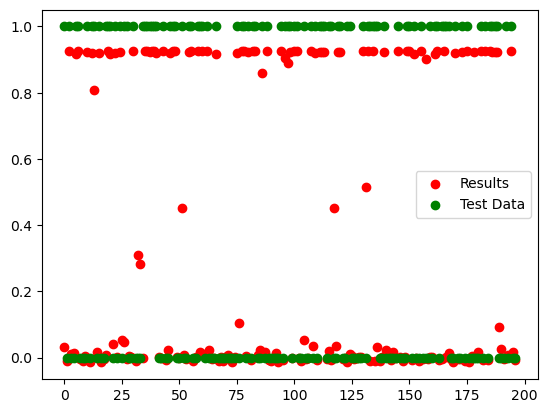

In [47]:
plt.scatter(range(len(results)), results, c = 'r', label = 'Results')
plt.scatter(range(len(y_test)), y_test, c = 'g', label = 'Test Data')
plt.legend()
plt.show()

In [48]:
#model_predictions

In [49]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


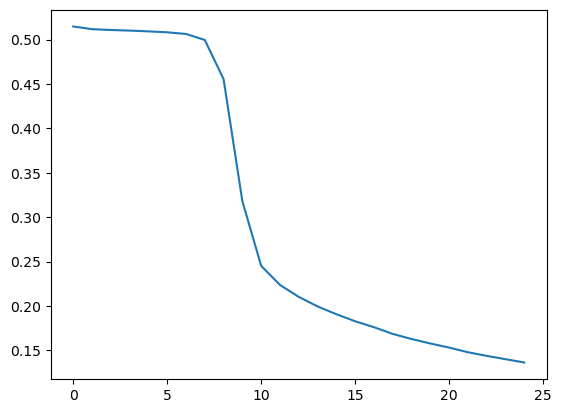

In [50]:
plt.plot(history.history['loss'])
plt.show()

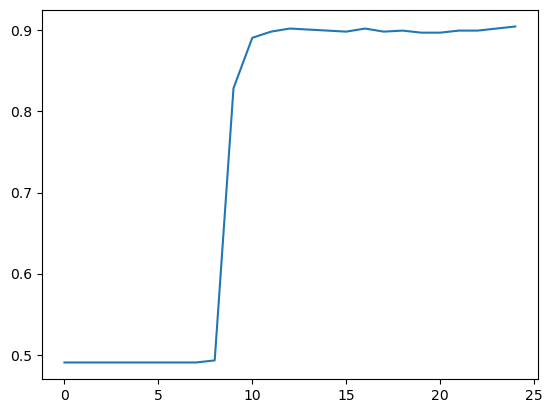

In [51]:
plt.plot(history.history['accuracy'])
plt.show()

In [52]:
#calculations

In [53]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Confusion Matrix : ")
print(cm)
print("Accuracy Score : ",accuracy)
print("Precision Score : ",precision)
print("Recall Score : ",recall)

Confusion Matrix : 
[[106   0]
 [ 91   0]]
Accuracy Score :  0.5380710659898477
Precision Score :  0.28952047205545106
Recall Score :  0.5380710659898477


C:\Users\MADHUSUDAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#learning_curve

In [55]:
def learning_curve(history, epoch):    
    epoch_range = range(1, epoch+1)    
# Plotting Model Accuracy
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()    
# Plotting Model Loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
# Plotting Precision
    plt.plot(epoch_range, history.history['precision'])
    plt.plot(epoch_range, history.history['val_precision'])
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
# Plotting Recall
    plt.plot(epoch_range, history.history['recall'])
    plt.plot(epoch_range, history.history['val_recall'])
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

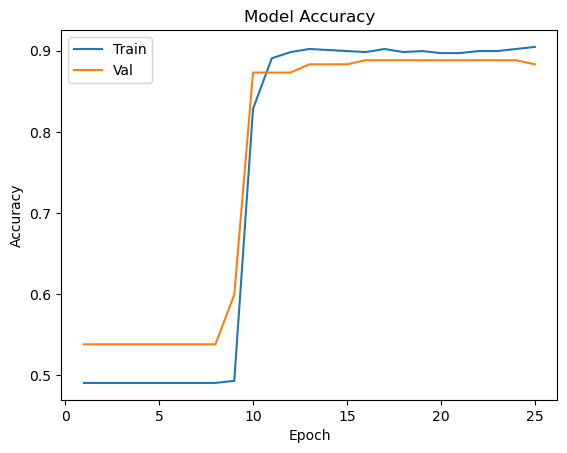

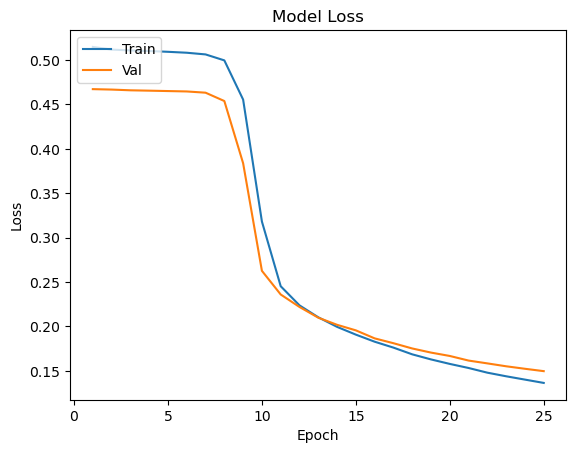

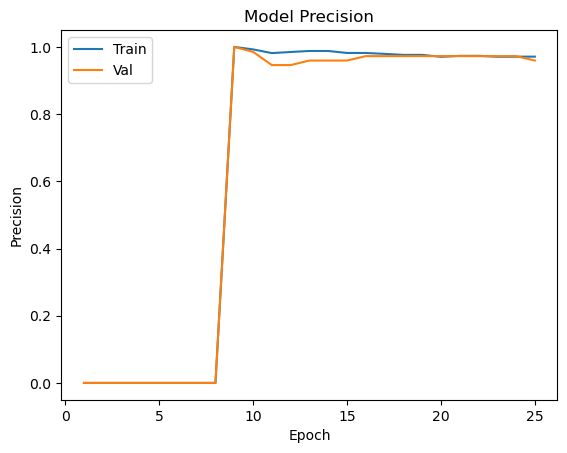

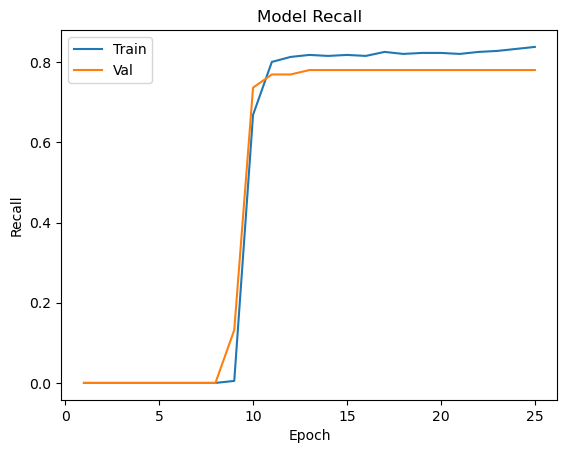

In [57]:
learning_curve(history, 25)